In [1]:
import pandas as pd

import simulation

In [2]:
sim = simulation.Simulation(300, 100_000, 10*7, 0.6, 2)

In [3]:
sim.init_simulation()

In [4]:
sim.run_simulation()

100%|██████████| 70/70 [07:20<00:00,  6.29s/it]


In [5]:
results = pd.DataFrame(sim.results)

In [6]:
results['week'] = (results.iteration + 1) // 7
byweek = results.groupby(['week', 'movie']).sum().selections.reset_index()

In [8]:
top_ten = byweek.sort_values(by=['week', 'selections'], ascending=False).groupby('week').head(10)

In [11]:
top_ten['rank'] = top_ten.groupby('week').cumcount()+1

<AxesSubplot:>

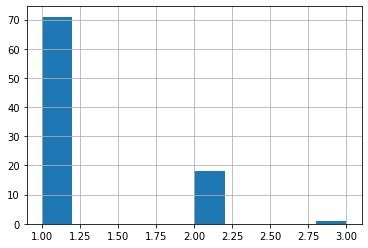

In [16]:
# Cumulative weeks
top_ten.groupby('movie').nunique()['week'].hist()

<AxesSubplot:xlabel='rank'>

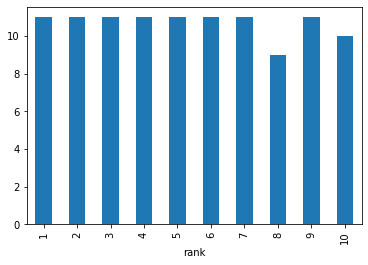

In [21]:
# Rank occupants
top_ten.groupby('rank').nunique()['movie'].plot(kind='bar')

<AxesSubplot:>

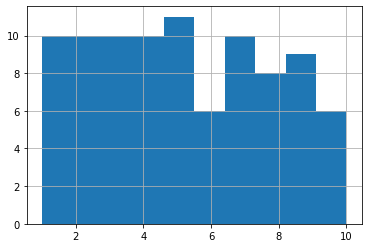

In [26]:
# First rank distribution
top_ten.sort_values(by='week').groupby('movie').first()['rank'].hist()